# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="imagens/NORMAL2-IM-1422-0001.jpeg">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Camila Okamura           | RM 339624      | `17IA` |
| Cleiton Lima             | RM 339656      | `17IA` |
| Henrique Faria           | RM 340214      | `17IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="imagens/pneumonia.jpeg">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="imagens/raiox.png" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.

A construção do modelo será utilizada o framework Keras.

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

**Resposta**:

controle
bacteria
viral

## 4.2 Componentes obrigatórios

Este projeto requer a instalação dos seguintes componentes, via ```conda install```:

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [1]:
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import glob
import cv2
from PIL import Image

%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50, vgg16, vgg19, Xception
from keras.applications import Xception
from keras.applications.xception import preprocess_input
from keras.applications.resnet import preprocess_input as res_pre_input
from keras.applications.vgg16 import preprocess_input as vgg16_pre_input
from keras.applications.vgg19 import preprocess_input as vgg19_pre_input
from keras.applications.xception import preprocess_input as xception_pre_input
from keras import Model, layers, Sequential
from keras.models import load_model, model_from_json

import keras.backend as K

plt.style.use('seaborn')
sns.set_style("whitegrid")

# Funções Auxiliares

In [2]:

def plot_history(history):
    precision = history.history['precision_score']
    val_precision = history.history['val_precision_score']
    recall = history.history['recall_score']
    val_recall = history.history['val_recall_score']
    f1_score = history.history['f1_score']
    val_f1_score = history.history['val_f1_score']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(f1_score) + 1)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 2, 1)
    plt.plot(x, precision, 'b', label='Training Precision')
    plt.plot(x, val_precision, 'r', label='Validation Precision')
    plt.title('Training and Validation Precision')
    plt.legend()
    plt.subplot(2, 2, 2)
    plt.plot(x, recall, 'b', label='Training Recall')
    plt.plot(x, val_recall, 'r', label='Validation Recall')
    plt.title('Training and Validation Recall')
    plt.legend()
    plt.subplot(2, 2, 3)
    plt.plot(x, f1_score, 'b', label='Training F1 Score')
    plt.plot(x, val_f1_score, 'r', label='Validation F1 Score')
    plt.title('Training and Validation F1 Score')
    plt.legend()
    plt.subplot(2, 2, 4)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
class ModelCheckpoint_tweaked(tf.keras.callbacks.ModelCheckpoint):
    def __init__(self,
                   filepath,
                   monitor='val_loss',
                   verbose=0,
                   save_best_only=False,
                   save_weights_only=False,
                   mode='auto',
                   save_freq='epoch',
                   options=None,
                   **kwargs):
        
        #Change tf_utils source package.
        from tensorflow.python.keras.utils import tf_utils
        
        super(ModelCheckpoint_tweaked, self).__init__(filepath,
                   monitor,
                   verbose,
                   save_best_only,
                   save_weights_only,
                   mode,
                   save_freq,
                   options,
                   **kwargs)
        

## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.

### Analisando a base de dados original encontramos 3 pastas: train, test and val. A pasta val, de validação tem apenas 8 imagens normais e 8 imagens com pneumonia. Por ser muito pouco decidimos juntá-las a pasta de treino.<BR>Depois separamos os dados de treino e teste em 3 pastas, uma para cada uma das nossas classes.

In [3]:
train_path = "./raiox/train/"
test_path = "./raiox/test/"

## Plotamos a distribuição das classses de treino e percebemos que temos uma quantidade muito maior da classe bactéria o que pode enviesar o nosso estudo.

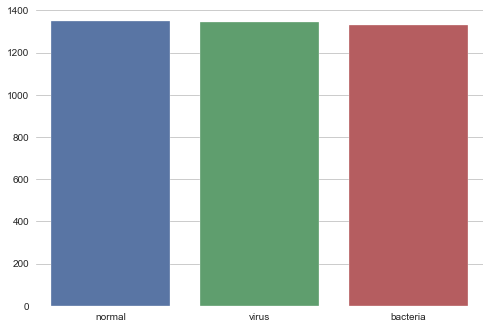

In [4]:
normal = glob.glob(train_path + "normal/*.jpeg")
virus = glob.glob(train_path + "virus/*.jpeg")
bacteria = glob.glob(train_path + "bacteria/*.jpeg")

sns.barplot(x = ["normal", "virus", "bacteria"], y = [len(normal), len(virus), len(bacteria)])
plt.show()

### Vamos retirar as imagens da classe bacteria que possuem uma proporção entre X e Y menor que 0.67 para equalizarmos a quantidade das três classes.

In [5]:
bacteria_shape = []
count = 0
for idx, file in enumerate(bacteria):
    imagem = cv2.imread(file)
    shape = imagem.shape[0]/imagem.shape[1]
    if shape < 0.67:
        bacteria_shape.append(idx)
        count += 1
print(count)       

0


In [6]:
# Rodar apenas na primeira vez para separar as imagens
#for idx in bacteria_shape:
#    shutil.move(bacteria[idx], train_path + "../bacteria_retirados/")        

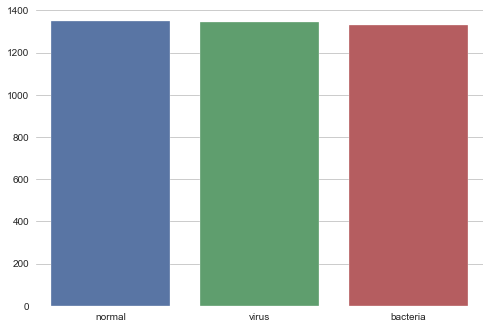

In [6]:
bacteria = glob.glob(train_path + "bacteria/*.jpeg")
sns.barplot(x = ["normal", "virus", "bacteria"], y = [len(normal), len(virus), len(bacteria)])
plt.show()

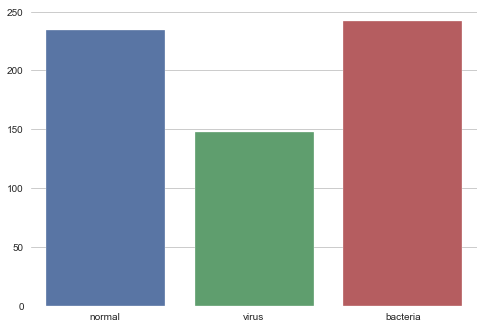

In [7]:
normal = glob.glob(test_path + "normal/*.jpeg")
virus = glob.glob(test_path + "virus/*.jpeg")
bacteria = glob.glob(test_path + "bacteria/*.jpeg")

sns.barplot(x = ["normal", "virus", "bacteria"], y = [len(normal), len(virus), len(bacteria)])
plt.show()

In [9]:
#divisao_treino_validacao = 0.2

In [8]:

train_datagen = ImageDataGenerator(
    preprocessing_function=res_pre_input,
    rotation_range=0.2,
    horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
    "raiox/train/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224))

Found 4024 images belonging to 3 classes.


In [9]:
val_datagen = ImageDataGenerator(preprocessing_function=res_pre_input)

val_generator = val_datagen.flow_from_directory(
    "raiox/test/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224))

Found 624 images belonging to 3 classes.


In [10]:
print(f"classes do conjunto de treino: {train_generator.class_indices}")
print(f"classes do conjunto de validação: {val_generator.class_indices}")

classes do conjunto de treino: {'bacteria': 0, 'normal': 1, 'virus': 2}
classes do conjunto de validação: {'bacteria': 0, 'normal': 1, 'virus': 2}


## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG16 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [11]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

<p align="center">
    <img src="imagens/Resnet50.png" height="60%" width="60%">
</p>

A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outas imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [12]:
## IMPLEMENTE

qtde_classes = len(train_generator.class_indices)
qtde_classes

3

In [13]:
conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [14]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [15]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [16]:
## IMPLEMENTE

qtde_epocas = 50

In [17]:
checkpointer = ModelCheckpoint_tweaked(filepath='./modelo_resnet50.hdf5', verbose=1,  mode='max', save_best_only=True, monitor='val_f1_score')

history = model.fit(train_generator, 
                    epochs=qtde_epocas,
                    validation_steps=5,
                    steps_per_epoch=5,
                    validation_data=val_generator,
                    callbacks=[checkpointer])

Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 2.0900 - precision_score: 0.3660 - recall_score: 0.3375 - f1_score: 0.3506
Epoch 00001: val_f1_score improved from -inf to 0.42539, saving model to .\modelo_resnet50.hdf5
5/5 [==============================] - 6s 1s/step - loss: 2.0900 - precision_score: 0.3660 - recall_score: 0.3375 - f1_score: 0.3506 - val_loss: 1.3491 - val_precision_score: 0.4402 - val_recall_score: 0.4125 - val_f1_score: 0.4254
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.7769 - precision_score: 0.6543 - recall_score: 0.6000 - f1_score: 0.6254
Epoch 00002: val_f1_score improved from 0.42539 to 0.56664, saving model to .\modelo_resnet50.hdf5
5/5 [==============================] - 5s 941ms/step - loss: 0.7769 - precision_score: 0.6543 - recall_score: 0.6000 - f1_score: 0.6254 - val_loss: 0.9309 - val_precision_score: 0.6076 - val_recall_score: 0.5312 - val_f1_score: 0.5666
Epoch 3/50
5/5 [==============================] - ETA: 0

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

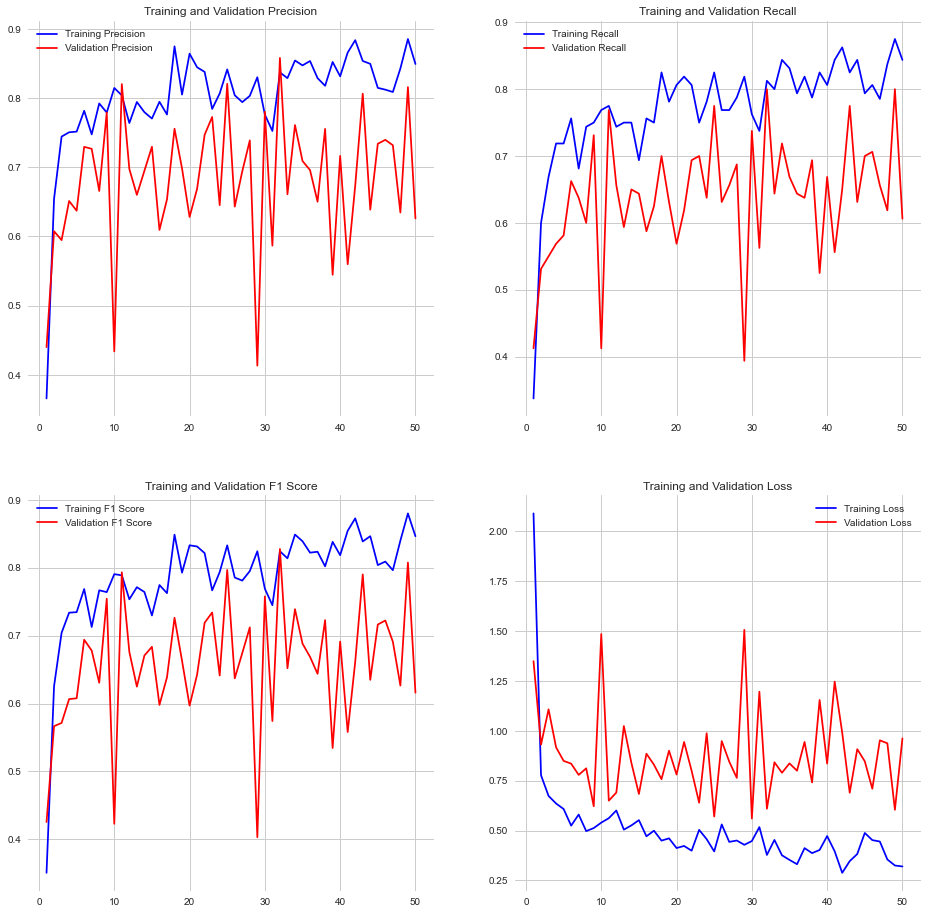

In [18]:
plot_history(history)

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

In [19]:
model = load_model("./modelo_resnet50.hdf5", custom_objects={'f1_score': f1_score, 'precision_score': precision_score, 'recall_score': recall_score})

scores = model.evaluate(val_generator)
print()
print(f"Precision Score: {round(scores[1]*100,2)}%")
print(f"Recall Score: {round(scores[2]*100,2)}%")
print(f"F1 Score: {round(scores[3]*100,2)}%")

20/20 [==============================] - 5s 271ms/step - loss: 0.6654 - precision_score: 0.7994 - recall_score: 0.7281 - f1_score: 0.7615

Precision Score: 79.94%
Recall Score: 72.81%
F1 Score: 76.15%


**Resposta**:

### 4.5.2 Arquitetura VGG16

**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

In [71]:
conv_base = vgg16.VGG16(include_top=False) 

for layer in conv_base.layers:
    layer.trainable = False

In [72]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128) 

In [73]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [69]:
checkpointer = ModelCheckpoint_tweaked(filepath='./modelo_vgg16.hdf5', verbose=1,  mode='max', save_best_only=True, monitor='val_f1_score')

history = model.fit(train_generator, 
                    epochs=qtde_epocas, 
                    validation_steps=5, 
                    steps_per_epoch=5, 
                    validation_data=val_generator,
                    callbacks=[checkpointer])

Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 2.9349 - precision_score: 0.3721 - recall_score: 0.3562 - f1_score: 0.3639
Epoch 00001: val_f1_score improved from -inf to 0.66839, saving model to .\modelo_vgg16.hdf5
5/5 [==============================] - 5s 952ms/step - loss: 2.9349 - precision_score: 0.3721 - recall_score: 0.3562 - f1_score: 0.3639 - val_loss: 1.1307 - val_precision_score: 0.6886 - val_recall_score: 0.6500 - val_f1_score: 0.6684
Epoch 2/10
5/5 [==============================] - ETA: 0s - loss: 1.3911 - precision_score: 0.5386 - recall_score: 0.5125 - f1_score: 0.5249
Epoch 00002: val_f1_score did not improve from 0.66839
5/5 [==============================] - 4s 821ms/step - loss: 1.3911 - precision_score: 0.5386 - recall_score: 0.5125 - f1_score: 0.5249 - val_loss: 1.4315 - val_precision_score: 0.4964 - val_recall_score: 0.4750 - val_f1_score: 0.4853
Epoch 3/10
5/5 [==============================] - ETA: 0s - loss: 1.3759 - precision_score: 0.5999 -

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

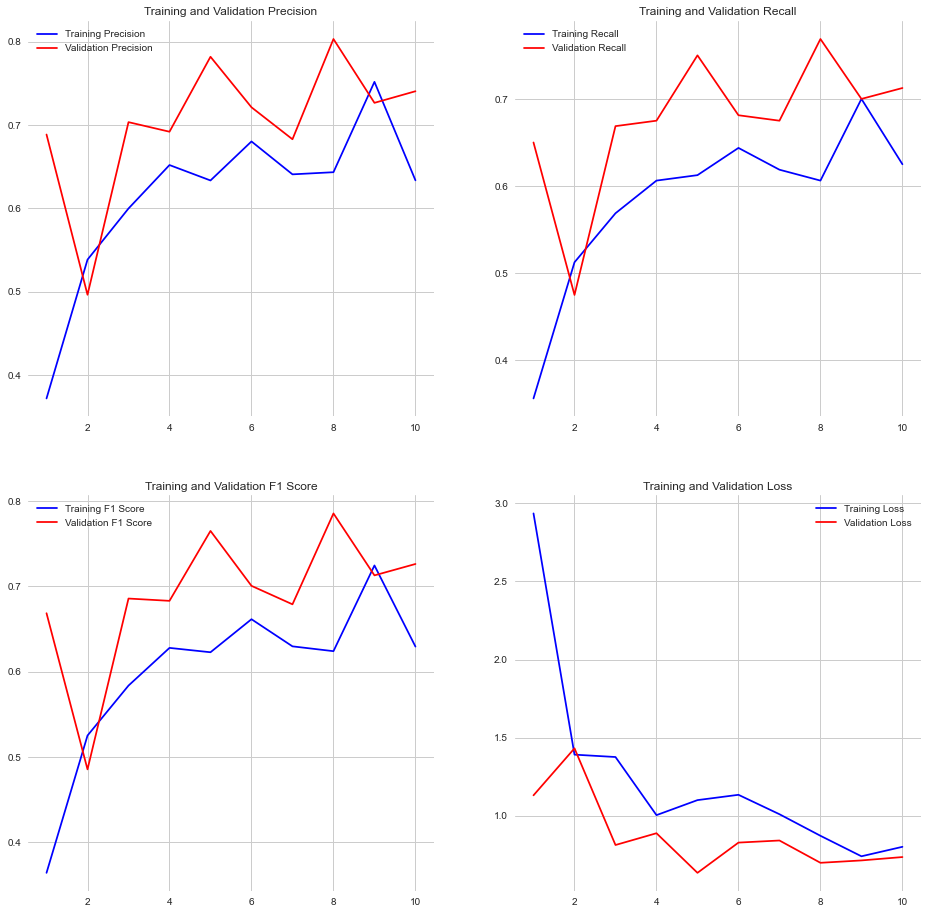

In [70]:
plot_history(history)

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:

In [65]:
model = load_model("./modelo_vgg16.hdf5", custom_objects={'f1_score': f1_score, 'precision_score': precision_score, 'recall_score': recall_score})

scores = model.evaluate(val_generator)
print()
print(f"Precision Score: {round(scores[1]*100,2)}%")
print(f"Recall Score: {round(scores[2]*100,2)}%")
print(f"F1 Score: {round(scores[3]*100,2)}%")

20/20 [==============================] - 5s 240ms/step - loss: 0.6056 - precision_score: 0.7990 - recall_score: 0.7828 - f1_score: 0.7907

Precision Score: 79.9%
Recall Score: 78.28%
F1 Score: 79.07%


### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

In [55]:
conv_base = vgg19.VGG19(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [56]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(4096, activation='relu')(x) 
x = layers.Dense(4096, activation='relu')(x) 
x = layers.Dense(1000, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)  

In [57]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [58]:
checkpointer = ModelCheckpoint_tweaked(filepath='./modelo_vgg19.hdf5', verbose=1,  mode='max', save_best_only=True, monitor='val_f1_score')

history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator,
                              callbacks=[checkpointer])

Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 1.7344 - precision_score: 0.4733 - recall_score: 0.4437 - f1_score: 0.4580
Epoch 00001: val_f1_score improved from -inf to 0.46532, saving model to .\modelo_vgg19.hdf5
5/5 [==============================] - 5s 1s/step - loss: 1.7344 - precision_score: 0.4733 - recall_score: 0.4437 - f1_score: 0.4580 - val_loss: 1.4111 - val_precision_score: 0.4819 - val_recall_score: 0.4500 - val_f1_score: 0.4653
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 1.4299 - precision_score: 0.5616 - recall_score: 0.5250 - f1_score: 0.5422
Epoch 00002: val_f1_score improved from 0.46532 to 0.65602, saving model to .\modelo_vgg19.hdf5
5/5 [==============================] - 5s 1s/step - loss: 1.4299 - precision_score: 0.5616 - recall_score: 0.5250 - f1_score: 0.5422 - val_loss: 1.2213 - val_precision_score: 0.6757 - val_recall_score: 0.6375 - val_f1_score: 0.6560
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss:

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

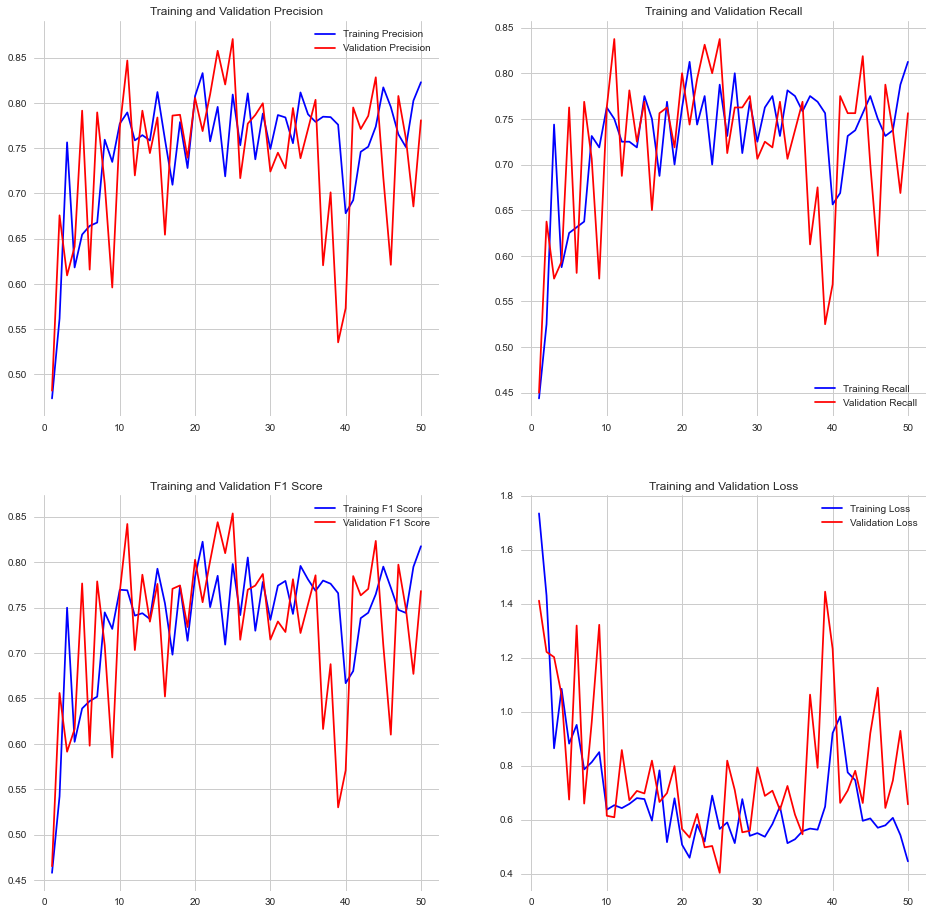

In [59]:
plot_history(history)

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

In [60]:
model = load_model("./modelo_vgg19.hdf5", custom_objects={'f1_score': f1_score, 'precision_score': precision_score, 'recall_score': recall_score})

scores = model.evaluate(val_generator)
print()
print(f"Precision Score: {round(scores[1]*100,2)}%")
print(f"Recall Score: {round(scores[2]*100,2)}%")
print(f"F1 Score: {round(scores[3]*100,2)}%")

20/20 [==============================] - 6s 303ms/step - loss: 0.5403 - precision_score: 0.8196 - recall_score: 0.7953 - f1_score: 0.8071

Precision Score: 81.96%
Recall Score: 79.53%
F1 Score: 80.71%


**Resposta**:

## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|----------|---------------|----------|
| ResNet50 | XX %     | XX %          | XX %     |
| VGG16    | XX %     | XX %          | XX %     |
| VGG19    | XX %     | XX %          | XX %     |

## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.

**Respota**:

## 4.8 Abordagem Extra

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

In [85]:
train_datagen = ImageDataGenerator(
    preprocessing_function=xception_pre_input,
    zoom_range=0.2,
    rotation_range=0.2,
    horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
    "raiox/train/",
    seed=42,
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(299,299))

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
print(STEP_SIZE_TRAIN)

Found 4024 images belonging to 3 classes.
125


In [86]:
val_datagen = ImageDataGenerator(preprocessing_function=xception_pre_input)

val_generator = val_datagen.flow_from_directory(
    "raiox/test/",
    seed=42,
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(299,299))

STEP_SIZE_VALID = val_generator.n // val_generator.batch_size
print(STEP_SIZE_VALID)

Found 624 images belonging to 3 classes.
19


In [87]:
conv_base = Xception(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [88]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_8[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________

In [89]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [90]:
checkpointer = ModelCheckpoint_tweaked(filepath='./modelo_xception.hdf5', verbose=1,  mode='max', save_best_only=True, monitor='val_f1_score')

history = model.fit_generator(generator=train_generator, 
                              epochs=100, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator,
                              callbacks=[checkpointer])

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 1.0219 - precision_score: 0.5460 - recall_score: 0.2812 - f1_score: 0.3509
Epoch 00001: val_f1_score improved from -inf to 0.44365, saving model to .\modelo_xception.hdf5
5/5 [==============================] - 9s 2s/step - loss: 1.0219 - precision_score: 0.5460 - recall_score: 0.2812 - f1_score: 0.3509 - val_loss: 0.9172 - val_precision_score: 0.6501 - val_recall_score: 0.3375 - val_f1_score: 0.4436
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.8092 - precision_score: 0.6831 - recall_score: 0.5312 - f1_score: 0.5960
Epoch 00002: val_f1_score improved from 0.44365 to 0.61750, saving model to .\modelo_xception.hdf5
5/5 [==============================] - 7s 1s/step - loss: 0.8092 - precision_score: 0.6831 - recall_score: 0.5312 - f1_score: 0.5960 - val_loss: 0.7775 - val_precision_score: 0.7453 - val_recall_score: 0.5312 - val_f1_score: 0.6175
Epoch 3/100
5/5 [==============================] - ETA: 0

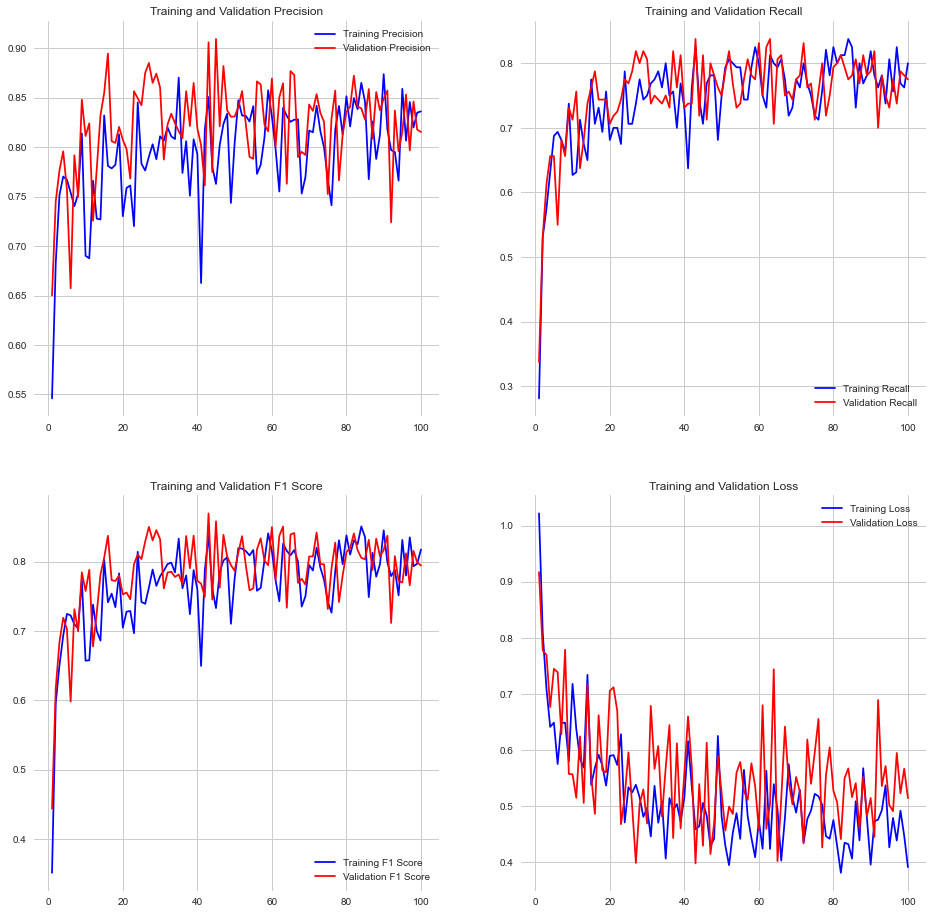

In [91]:
plot_history(history)

In [92]:
model = load_model("./modelo_xception.hdf5", custom_objects={'f1_score': f1_score, 'precision_score': precision_score, 'recall_score': recall_score})

scores = model.evaluate(val_generator)
print()
print(f"Precision Score: {round(scores[1]*100,2)}%")
print(f"Recall Score: {round(scores[2]*100,2)}%")
print(f"F1 Score: {round(scores[3]*100,2)}%")

20/20 [==============================] - 11s 544ms/step - loss: 0.4412 - precision_score: 0.8700 - recall_score: 0.8109 - f1_score: 0.8390

Precision Score: 87.0%
Recall Score: 81.09%
F1 Score: 83.9%


### 4.8.1 Conclusões sobre a abordagem extra

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

**Resposta**: